<a href="https://colab.research.google.com/github/Ashen0923/Pytorch-Learning/blob/main/02_PyTorch_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Neural Network Classification with PyTorch

Classificaion is a problem of predicting whether something is one thing or another (there can be multiple things as the options)

### 1. Make classification data and get it ready

In [2]:
import sklearn

In [3]:
from sklearn.datasets import make_circles

#Make 1000 samples
n_samples = 1000

#Create circles
x,y = make_circles(n_samples,noise = 0.03,random_state = 42)

In [4]:
len(x),len(y)

(1000, 1000)

In [5]:
print(f"First 5 samples of  x:\n {x[:5]}")
print(f"First 5 samples of  y:\n {y[:5]}")


First 5 samples of  x:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of  y:
 [1 1 1 1 0]


In [6]:
#Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1": x[:,0],
                        "X2":x[:, 1],
                        "label":y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


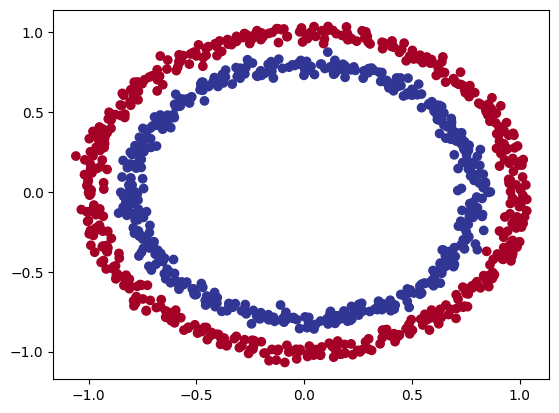

In [7]:
#Visualize, visualize, visualize
import matplotlib.pyplot as plt
plt.scatter(x=x[:,0],
            y=x[:,1],
            c=y,
            cmap = plt.cm.RdYlBu);


**Note** the data we're working with is often refeered to as a toy dataset, that is small enough to experiment but still sizeable enough to practice the fundamentals.

###1.1 Check input and output shapes

In [8]:
x.shape, y.shape

((1000, 2), (1000,))

In [9]:
#View the first example of features and labels
x_sample = x[0]
y_sample = y[0]

print(f"Values for one sample of X: {x_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {x_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


###1.2 Turn data into tensors and create train and test splits

In [10]:
#Turn data into tensors
import torch
torch.__version__

'2.5.1+cu124'

In [11]:
x.dtype

dtype('float64')

In [12]:
type(x)

numpy.ndarray

In [13]:
x = torch.from_numpy(x).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

x[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [14]:
type(x), x.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [15]:
#Split data into training and test sets
from sklearn.model_selection import train_test_split

x_train, x_test ,y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size = 0.2, #20% of data will be test & 80% of data will be train
                                                    random_state = 42)




In [16]:
len(x_train), len(x_test), len(y_train), len(y_test)

(800, 200, 800, 200)

### 2. Building a model

Let's build a model to classify our blue and red dots.

To do so, we want to
1. Setup device agnostic code so our code will run on as an accelerator (GPU) if there is one
2. Construct a model (by subclassing `nn.Module`).
3. Define a loss function and optimizer
4. Create a training and test loop

In [17]:
#Import Pytorch and nn
import torch
from torch import nn

#Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

Now we've setup device agnostic code, let's create a model that:

1. Subclasses `nn.Module` (almost all models in PyTorch subclass `nn.Module`)
2. Create  `nn.Linear()` layers that are capable of handling the shapes of our data
3. Defines a `forward()` method that outlines the forward pass or (forward computation) of the model
4. Instantiate an instance of our model class and send it to the target `device`

In [18]:
1.# Construct a midel that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    #2. Create 2 nn.linear layers capable of handling the shapes of the data
    self.layer_1 = nn.Linear(in_features = 2, out_features = 5) #takes into 2 features and upscale 5 features
    self.layer_2 = nn.Linear(in_features = 5, out_features = 1) #takes in 5 features from previous layer and upscale  to one feature

  #3. Define a forward() method that outlines the forward pass
  def forward(self,x):
    return self.layer_2(self.layer_1(x)) #x -> layer_1 -layer_2 -> output

#4. Instantiate an instace of our model class and send it to the target device
model_0 = CircleModelV0().to(device)
model_0




CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [19]:
device

'cuda'

In [20]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [21]:
#lets replicate the model above using nn.sequential
model_0 = nn.Sequential(
    nn.Linear(in_features = 2, out_features = 5),
    nn.Linear(in_features = 5, out_features = 1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [22]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.5745, -0.3550],
                      [ 0.0011, -0.1221],
                      [-0.0205, -0.0879],
                      [-0.4269, -0.6204],
                      [-0.2471, -0.5352]], device='cuda:0')),
             ('0.bias',
              tensor([-0.2634, -0.2031, -0.4469, -0.4468, -0.3874], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.3553, -0.1594,  0.4129,  0.2577,  0.1307]], device='cuda:0')),
             ('1.bias', tensor([0.0934], device='cuda:0'))])

In [23]:
#Make predictions
with torch.inference_mode():
  untrained_preds = model_0(x_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}")
print(f"Shape of predictions: {untrained_preds.shape}")
print(f"Length of test samples: {len(x_test)},Shape: {x_test.shape}")
print(f"First 10 predictions: {torch.round(untrained_preds[:10])}")
print(f"first 10 test labels: {y_test[:10]}")

Length of predictions: 200
Shape of predictions: torch.Size([200, 1])
Length of test samples: 200,Shape: torch.Size([200, 2])
First 10 predictions: tensor([[-0.],
        [-1.],
        [ 0.],
        [-1.],
        [-0.],
        [-0.],
        [-1.],
        [-1.],
        [ 0.],
        [-1.]], device='cuda:0')
first 10 test labels: tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


###2.1 Setup loss function and optimizer

which loss function or optimier should you use?

Again.. this is problem specefic.

For example for regression you might want MAE or MSE(mean absolute error or mean squared error)

For classification you might want binary cross entropy or categorical cross entropy(cross entropy)

As a remindee the loss function measures how *wrong* your models predictions are.

And for optimizers, two of the most common and useful and SGD and Adam, however Pytorch has many built in options.

In [24]:
#Setup the loss function
loss_fn = nn.BCEWithLogitsLoss() #BCELoss = requires inputs to have gone throgh the sigmoid activaton function price loss

#Setup the optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.1)



In [25]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.5745, -0.3550],
                      [ 0.0011, -0.1221],
                      [-0.0205, -0.0879],
                      [-0.4269, -0.6204],
                      [-0.2471, -0.5352]], device='cuda:0')),
             ('0.bias',
              tensor([-0.2634, -0.2031, -0.4469, -0.4468, -0.3874], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.3553, -0.1594,  0.4129,  0.2577,  0.1307]], device='cuda:0')),
             ('1.bias', tensor([0.0934], device='cuda:0'))])

In [26]:
#Calculate accuracy - out of 1-- examples, what percentage does our model right
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

###3. Train model

To train our model, we're going to need to build a training loop:

1. Forward pass
2. Calculate the loss
3. Optimizer zero grad
4. Loss bakcward (backpropagation)
5. Optimizer step(gradient descent)



###3.1 Going from raw logits -> prediction probabalities -> prediction labels

Our model outputs are going to be raw **logits**

We can convert these **logits** into prediction probablities by passing them to some kind of activation function. (eg - sigmoid for binary classification and softmax for multiclass classification

Then we can convert out model's prediction probablities to **prediction labels** by either rounding them or taking the `argmax()`

In [27]:
#View first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(x_test.to(device))[:5]
y_logits

tensor([[-0.4394],
        [-0.6815],
        [ 0.0488],
        [-0.5771],
        [-0.1837]], device='cuda:0')

In [28]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [29]:
#use the sigmoid activation function on our model logits to turn them into prediction probablities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.3919],
        [0.3359],
        [0.5122],
        [0.3596],
        [0.4542]], device='cuda:0')

In [30]:
torch.round(y_pred_probs)

tensor([[0.],
        [0.],
        [1.],
        [0.],
        [0.]], device='cuda:0')

For our prediction probablity balues, we need to perform a range-style rounding on them:
* `y_pred_probs` >= 0.5 , `y=1` (class 1 )
* `y_pred_probs` < 0.5, `y=0` (Class 0)

In [31]:
#Find the predicted labels
y_preds = torch.round(y_pred_probs)

#In full
y_pred_labels = torch.round(torch.sigmoid(model_0(x_test.to(device))[:5]))
y_pred_labels

#Check for equality
print(torch.eq(y_preds.squeeze(),y_pred_labels.squeeze()))

#Get rid of extra dimension
y_preds.squeeze()


tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 1., 0., 0.], device='cuda:0')

In [32]:
y_test[:5]


tensor([1., 0., 1., 0., 1.])

###3.2 Building a training and testing loop

In [33]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#Set the number of epochs
epochs = 100

#Put data to target device
x_train, x_test, y_train, y_test = x_train.to(device), x_test.to(device), y_train.to(device), y_test.to(device)

#Build training and evalution loop
for epoch in range(epochs):
  ###Training
  model_0.train()

  #1. Forward pass
  y_logits = model_0(x_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) #Convert logits into prediction probablities

  #2. Calculate loss/accuracy
  #loss = loss_fn(torch.sigmoid(y_logits)) #nn.BCELoss expects prediction probabalities as inputs
  loss =  loss_fn(y_logits, #nn.BCEEwithLogitloss expects raw logits as input
                  y_train)
  acc = accuracy_fn(y_true = y_train,
                    y_pred = y_pred)

  #3. Optimizer zero grad
  optimizer.zero_grad()

  #4. Loss backward
  loss.backward()

  #5. Optimizer step (gradient descent)
  optimizer.step()

  ###Testing
  model_0.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_0(x_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate test loss/accuracy
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true = y_test,
                           y_pred = test_pred)

  #Print out what's happening
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")



Epoch: 0 | Loss: 0.72094, Accuracy: 45.50% | Test Loss: 0.70808, Test Accuracy: 52.00%
Epoch: 10 | Loss: 0.70608, Accuracy: 47.12% | Test Loss: 0.69623, Test Accuracy: 52.50%
Epoch: 20 | Loss: 0.70030, Accuracy: 47.88% | Test Loss: 0.69243, Test Accuracy: 53.00%
Epoch: 30 | Loss: 0.69772, Accuracy: 49.12% | Test Loss: 0.69129, Test Accuracy: 53.50%
Epoch: 40 | Loss: 0.69637, Accuracy: 49.50% | Test Loss: 0.69106, Test Accuracy: 52.00%
Epoch: 50 | Loss: 0.69555, Accuracy: 49.50% | Test Loss: 0.69114, Test Accuracy: 52.50%
Epoch: 60 | Loss: 0.69500, Accuracy: 49.88% | Test Loss: 0.69132, Test Accuracy: 52.50%
Epoch: 70 | Loss: 0.69458, Accuracy: 50.12% | Test Loss: 0.69154, Test Accuracy: 51.00%
Epoch: 80 | Loss: 0.69427, Accuracy: 50.50% | Test Loss: 0.69175, Test Accuracy: 51.50%
Epoch: 90 | Loss: 0.69401, Accuracy: 50.75% | Test Loss: 0.69197, Test Accuracy: 51.00%


 ## 4. Make predictions and evaluate the model

From the metrics it looks like our model isn't learning anything

So to inspect it lets make some predictions and make them visual.

To do so, we're going o import a function called `plot_decision_boundary()

In [34]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)


from helper_functions import plot_predictions,plot_decision_boundary



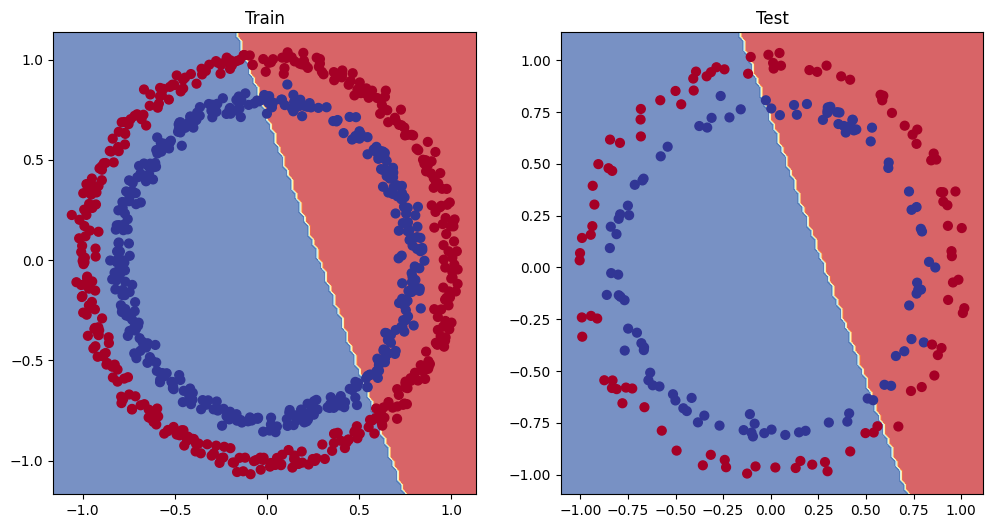

In [35]:
#Plot decision boundary of the model

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0,X=x_train,y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0,X=x_test,y=y_test)

##5. Improving a model (from a model persepctve)

* Add more layers - give the model more chances to learn about patterns in the data

*  Add more hidden units - fgo from 5 hidden units to 10 hidden units

* Fit for longer
* Changing the activation functions
* Changing the learning rate
* Changing the loss function

These options are all from a model's perspective because the deal directly with the model rather than the data

And because these options are all values we (as machine learning engineers and data scientists, they ar reffered as **hyperparameters**

Let's try and improve our model by:
* Adding more hidden units: 5 -> 10
* Increase the number of layers: 2->3
* Increase the number of epocgs: 100 - 100

In [36]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(in_features = 2, out_features = 10)
    self.layer2 = nn.Linear(in_features = 10, out_features = 10)
    self.layer3 = nn.Linear(in_features = 10, out_features = 1)

  def forward(self,x):
    z = self.layer1(x)
    ##z = torch.relu(z)
    z = self.layer2(z)
    ##z = torch.relu(z)
    z = self.layer3(z)
    return self.layer3(self.layer2(self.layer1(x))) # This way of writing operations leverages speed ups where possible behind the scenes

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
)

In [37]:
#Create a loss function
loss_fn = nn.BCEWithLogitsLoss()

#Create an optimizer
optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr = 0.1)

In [38]:
#Write a training and evaluation loop for model_1
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#Train for longer
epochs = 1000

#Put data on the target device
X_train, X_test, y_train, y_test = x_train.to(device), x_test.to(device), y_train.to(device), y_test.to(device)

for epoch in range(epochs):
  ###Training
  model_1.train()

  #1. Forward pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) #logits -> prediction probablities -> prediction featues

  #2. Calculate the loss/acc
  loss = loss_fn(y_logits,
                 y_train)
  acc = accuracy_fn(y_true = y_train,
                    y_pred = y_pred)

  #3. Optimizer zero grad
  optimizer.zero_grad

  #4. Loss Backward Propagation
  loss.backward()

  #5. Optimizer step (gradient descent)
  optimizer.step()

  ###Testing
  model_1.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate test loss/accuracy
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true = y_test,
                           y_pred = test_pred)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")



Epoch: 0 | Loss: 0.69396, Accuracy: 50.88% | Test Loss: 0.69261, Test Accuracy: 51.00%
Epoch: 100 | Loss: 0.69307, Accuracy: 51.25% | Test Loss: 0.69614, Test Accuracy: 46.50%
Epoch: 200 | Loss: 0.69301, Accuracy: 50.00% | Test Loss: 0.69426, Test Accuracy: 47.00%
Epoch: 300 | Loss: 0.69316, Accuracy: 49.50% | Test Loss: 0.69367, Test Accuracy: 51.50%
Epoch: 400 | Loss: 0.69306, Accuracy: 48.25% | Test Loss: 0.69475, Test Accuracy: 46.50%
Epoch: 500 | Loss: 0.69316, Accuracy: 50.50% | Test Loss: 0.69598, Test Accuracy: 47.00%
Epoch: 600 | Loss: 0.69335, Accuracy: 51.75% | Test Loss: 0.69407, Test Accuracy: 52.50%
Epoch: 700 | Loss: 0.69333, Accuracy: 51.00% | Test Loss: 0.69555, Test Accuracy: 49.00%
Epoch: 800 | Loss: 0.69325, Accuracy: 52.12% | Test Loss: 0.69472, Test Accuracy: 50.00%
Epoch: 900 | Loss: 0.69347, Accuracy: 50.25% | Test Loss: 0.69352, Test Accuracy: 49.50%


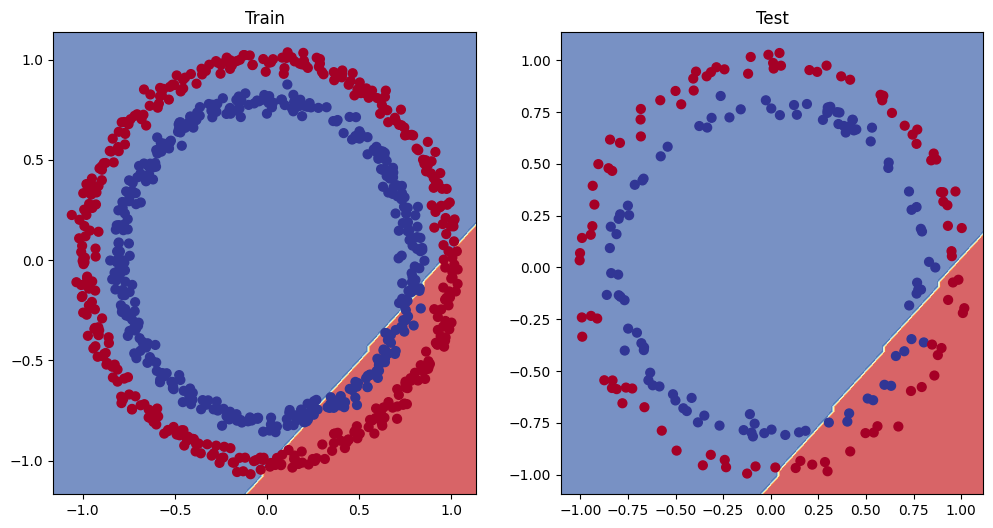

In [39]:
#Plot the decision boundary

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1,X=x_train,y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1,X=x_test,y=y_test)


###5.1 Preparing data to see if our model can fit a straight line

One way to troubleshoot to a larger problem is to test out a smaller problem

In [40]:
#Create some data
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

#Create data
X_regression = torch.arange(start,end,step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias #Linear regression formula

print(len(X_regression))
print(X_regression[:10])
print(y_regression[:10])

100
tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400],
        [0.0500],
        [0.0600],
        [0.0700],
        [0.0800],
        [0.0900]])
tensor([[0.3000],
        [0.3070],
        [0.3140],
        [0.3210],
        [0.3280],
        [0.3350],
        [0.3420],
        [0.3490],
        [0.3560],
        [0.3630]])


In [41]:
#Create train and test splits

train_split = int(0.8 * len(X_regression))
X_train, y_train = X_regression[:train_split], y_regression[:train_split]
X_test, y_test = X_regression[train_split:], y_regression[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(80, 80, 20, 20)

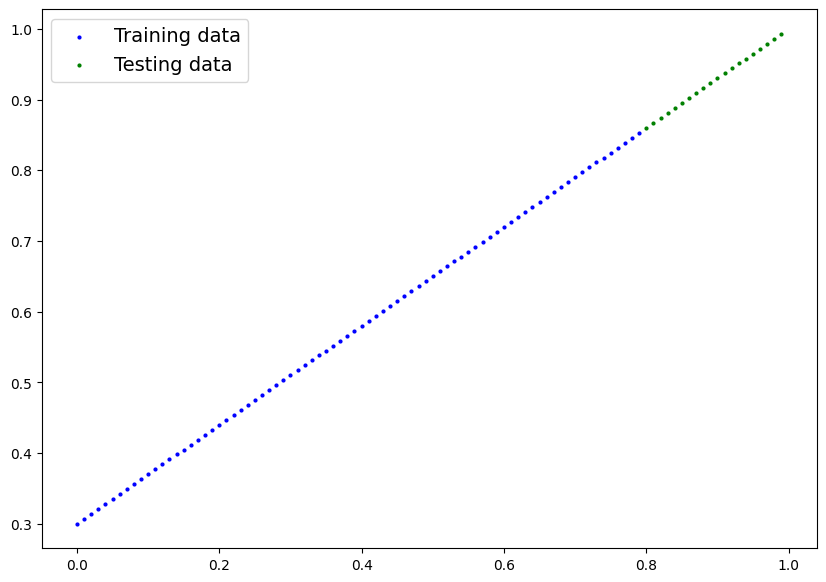

In [42]:
plot_predictions(train_data = X_train,
                 train_labels = y_train,
                 test_data = X_test,
                 test_labels = y_test);

###5.2 Adjusting `model_1` to fit a straight line

In [43]:
#Same architectire as model_1 (but using nn.Sequential())
model_2 = nn.Sequential(
    nn.Linear(in_features = 1, out_features = 10),
    nn.Linear(in_features = 10, out_features = 10),
    nn.Linear(in_features = 10, out_features = 1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [44]:
#Loss and Optimize
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_2.parameters(),
                            lr = 0.01)

In [45]:
#Train the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

#Put data on the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

#Training
for epoch in range(epochs):
  y_pred = model_2(X_train)
  loss = loss_fn(y_pred,y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  #Testing
  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test)
    test_loss = loss_fn(test_pred,y_test)

  #Print out whats happening
  if epoch %  100 ==0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test Loss: {test_loss:.5f}")

Epoch: 0 | Loss: 0.75986 | Test Loss: 0.91103
Epoch: 100 | Loss: 0.02858 | Test Loss: 0.00081
Epoch: 200 | Loss: 0.02533 | Test Loss: 0.00209
Epoch: 300 | Loss: 0.02137 | Test Loss: 0.00305
Epoch: 400 | Loss: 0.01964 | Test Loss: 0.00341
Epoch: 500 | Loss: 0.01940 | Test Loss: 0.00387
Epoch: 600 | Loss: 0.01903 | Test Loss: 0.00379
Epoch: 700 | Loss: 0.01878 | Test Loss: 0.00381
Epoch: 800 | Loss: 0.01840 | Test Loss: 0.00329
Epoch: 900 | Loss: 0.01798 | Test Loss: 0.00360


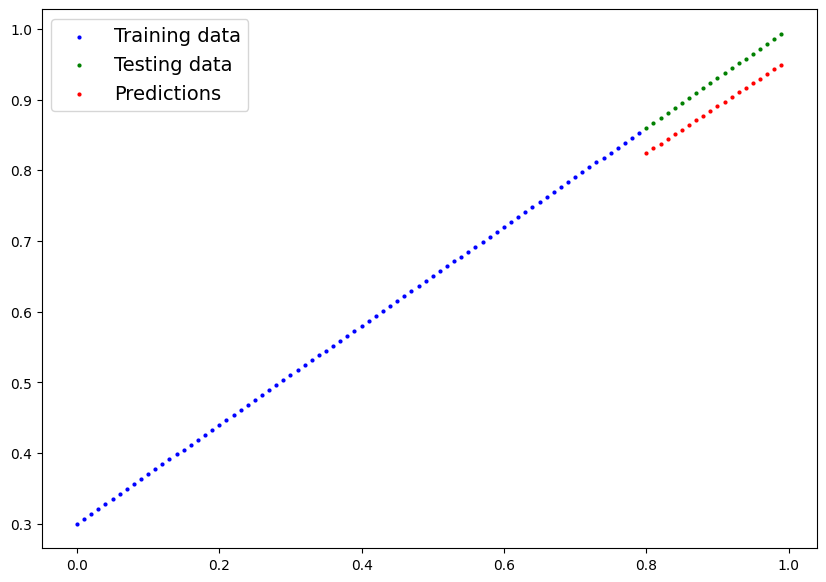

In [46]:
#Turn on evaluation mode
model_2.eval()

#Make predictions(inference)
with torch.inference_mode():
  y_preds = model_2(X_test)

#Plot data and predictions
plot_predictions(train_data = X_train.cpu(),
                 train_labels = y_train.cpu(),
                 test_data = X_test.cpu(),
                 test_labels = y_test.cpu(),
                 predictions = y_preds.cpu())

##6. The missing piece: non-linearity

"What patterns could you draw if you were given an infinite amount of a straight and non-straight lines?"

Or in machine learning terms, and infinite (but really it is finite) of linear and non-linear functions?

##6.1 Recreating non-linear data(red and blue circles)

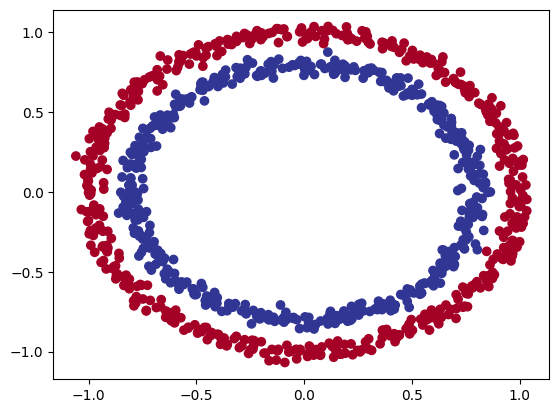

In [47]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X,y = make_circles(n_samples,
                   noise = 0.03,
                   random_state = 42)

plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.RdYlBu)

In [48]:
#Convert data to tensors and then to train and test splits
import torch
from sklearn.model_selection import train_test_split

#Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)

X_train[:5],y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

###6.2 Building a model with non-linearity

* Linear = straight linear
* Non Linear = non-straight lines

Artificial neural networks are a large combination of linear(straight) and non-straight(non-linear) functions which are potentially able to find patterns in data

In [49]:
#Build a model with non-linear activation function
from torch import nn

class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(in_features = 2, out_features = 10)
    self.layer2 = nn.Linear(in_features = 10, out_features = 10)
    self.layer3 = nn.Linear(in_features=10,out_features=1)
    self.relu = nn.ReLU()

  def forward(self,x):
    return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [50]:
#Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(),
                            lr = 0.1)

### 6.3 Training the model with Non-linearity

In [51]:
#Random seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#Put all data on target device
X_train,  y_train = X_train.to(device), y_train.to(device)
X_test,  y_test =  X_test.to(device), y_test.to(device)

#Loop through data
epochs = 1000

for epoch in range(epochs):
  ###Training
  model_3.train()

  #forward pass
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) #logits -> prediction probablities -> prediction labels

  #Calculate the loss/accuracy
  loss = loss_fn(y_logits,y_train) #BCEWithLogitsLoss
  acc = accuracy_fn(y_true = y_train,
                    y_pred = y_pred)

  #Optimizer zero grad
  optimizer.zero_grad()

  #loss backward
  loss.backward()

  #step the optimizer
  optimizer.step()

  ###Testing
  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits,y_test)
    test_acc = accuracy_fn(y_true = y_test,
                           y_pred = test_pred)

  #Print out whats happening

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69295, Accuracy: 50.00% | Test Loss: 0.69319, Test Accuracy: 50.00%
Epoch: 100 | Loss: 0.69115, Accuracy: 52.88% | Test Loss: 0.69102, Test Accuracy: 52.50%
Epoch: 200 | Loss: 0.68977, Accuracy: 53.37% | Test Loss: 0.68940, Test Accuracy: 55.00%
Epoch: 300 | Loss: 0.68795, Accuracy: 53.00% | Test Loss: 0.68723, Test Accuracy: 56.00%
Epoch: 400 | Loss: 0.68517, Accuracy: 52.75% | Test Loss: 0.68411, Test Accuracy: 56.50%
Epoch: 500 | Loss: 0.68102, Accuracy: 52.75% | Test Loss: 0.67941, Test Accuracy: 56.50%
Epoch: 600 | Loss: 0.67515, Accuracy: 54.50% | Test Loss: 0.67285, Test Accuracy: 56.00%
Epoch: 700 | Loss: 0.66659, Accuracy: 58.38% | Test Loss: 0.66322, Test Accuracy: 59.00%
Epoch: 800 | Loss: 0.65160, Accuracy: 64.00% | Test Loss: 0.64757, Test Accuracy: 67.50%
Epoch: 900 | Loss: 0.62362, Accuracy: 74.00% | Test Loss: 0.62145, Test Accuracy: 79.00%


### 6.4 Evaluating a model trained with non-linear activation functions


In [52]:
#Make predictions
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()

y_preds[:10], y_test[:10]


(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

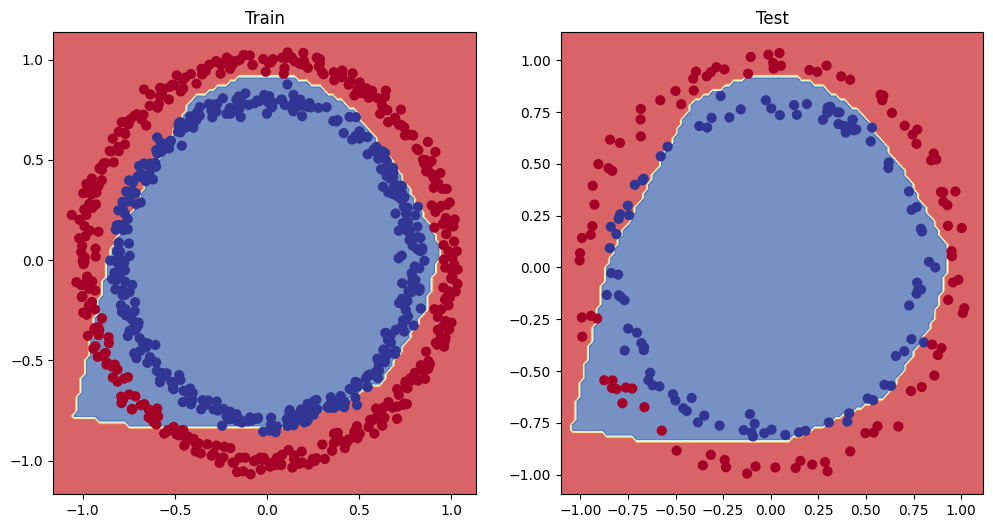

In [53]:
#Plot decision boundaries
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3,X=X_train,y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3,X=X_test,y=y_test)

###7. Replicating non-linear activation functions

Neural networks , rather than us telling the model what to learn,we give it the tools to discover patterns in data and it tries to figure out the patterns on its own

And these tools are linear & nonlinear functions

In [54]:
#Create a tensor
A = torch.arange(-10,10,1, dtype = torch.float32)
A.dtype

torch.float32

In [55]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

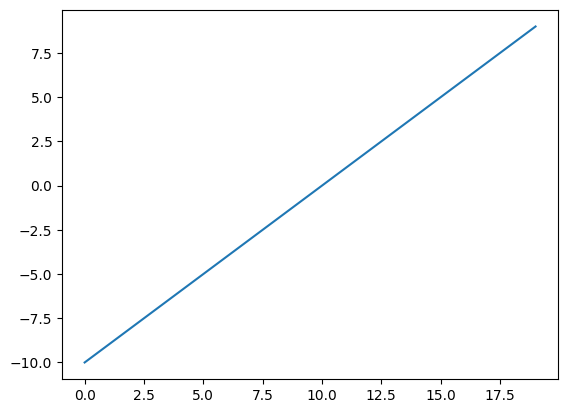

In [56]:
plt.plot(A)

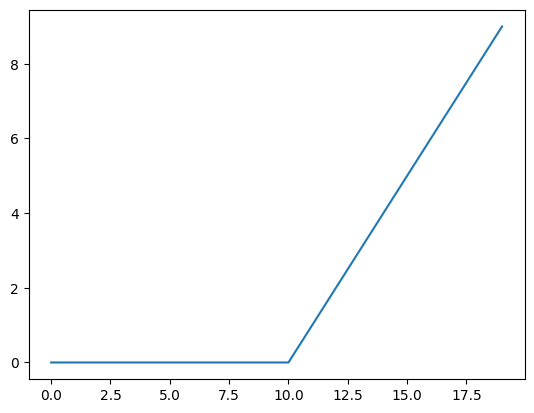

In [57]:
plt.plot(torch.relu(A))

In [58]:
def relu(x):
  return torch.maximum(torch.tensor(0),x)

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

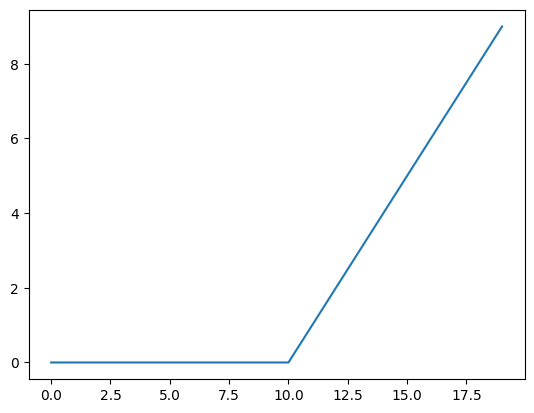

In [59]:
#Plot ReLu Activation Funtion
plt.plot(relu(A))

In [60]:
#Now lets do the sane for sigmoid
def sigmoid(x):
  return 1 /( 1+ torch.exp(-x))

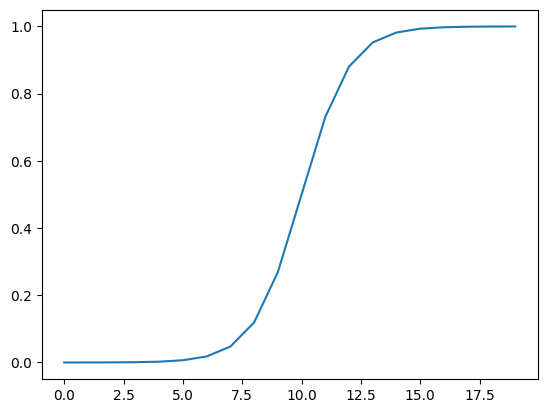

In [61]:
plt.plot(torch.sigmoid(A));

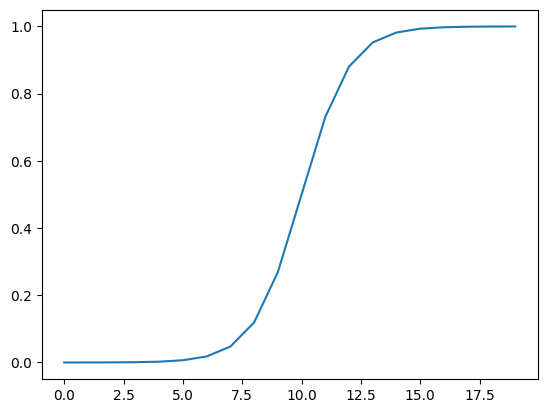

In [62]:
plt.plot(sigmoid(A));

###8. Putting it all together with a multi-class classificaton problem

* Binary Classification - one thing or another (cat vs dog, spam vs not spam, fraud or not fraud)

* Multi-class Classification - more than one thing or another (cat vs dog vs chicken)

###8.1 Creating a toy to multi class classification

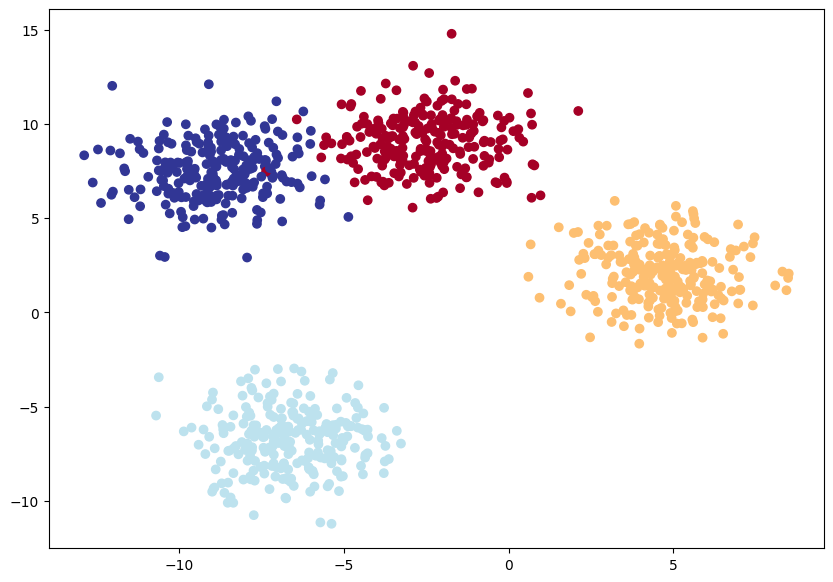

In [63]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

#Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

#1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features = NUM_FEATURES,
                            centers = NUM_CLASSES,
                            cluster_std = 1.5,
                            random_state = RANDOM_SEED)

#2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

#3. Split into train and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size = 0.2,
                                                                        random_state = RANDOM_SEED)

#$. Plot data
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0],X_blob[:,1],c=y_blob,cmap=plt.cm.RdYlBu);

###8.2 Buildinga multi-class classification model in PyTorch[link text]

In [64]:
#Create device agnstic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [65]:
#Build a multi class classification model
import torch.nn as nn

class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features = input_features, out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features = output_features)
    )

  def forward(self,x):
    return self.linear_layer_stack(x)

#Create an instance of BlobModel and send it to the target device
model_4 = BlobModel(input_features = 2,
                    output_features=4,
                    hidden_units=8).to(device)

model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [66]:
X_blob_train.shape,y_blob_train[:5]

(torch.Size([800, 2]), tensor([1, 0, 2, 2, 0]))

In [67]:
torch.unique(y_blob_train)

tensor([0, 1, 2, 3])

###8.3 Create a loss function and a optimizer for multiclass classification

In [68]:
#Create a loss function for multiclass classification
loss_fn = nn.CrossEntropyLoss()

#Create an optimizer for multi-class classification
optimizer = torch.optim.SGD(params = model_4.parameters(),
                            lr = 0.1)

###8.4 Getting prediction probablities for multi-class Pytorch model

In order to evaluate and train and test our model, we need to convert our model's outputs(logits) to prediction probablities and then to prediction labels

Logits(raw output of the model) -> Pred probs (use `torch.softmax`) -> Pred labels ( take the argmax of prediction probablities)

In [69]:
#Lets get some raw outputs of our model
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test.to(device))

y_logits[:10]

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834],
        [-0.1497, -1.0617, -0.7107, -0.1645],
        [ 0.1539, -0.2887,  0.1520, -0.0109],
        [-0.2154, -1.1795, -0.9300, -0.2745],
        [ 0.2443, -0.2472,  0.1649,  0.0061],
        [-0.2329, -1.2120, -0.9849, -0.3004]], device='cuda:0')

In [70]:
#Convert our model's logit outputs to prediction probabalities
y_pred_probs = torch.softmax(y_logits,dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]], device='cuda:0')
tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463]], device='cuda:0')


In [71]:
#Convert our model's pediction probablities to prediction labels
y_preds = torch.argmax(y_pred_probs,dim=1)
y_preds

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1], device='cuda:0')

In [72]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

### 8.5 Create a training and testing loop for multi class classification

In [73]:
#Fit the multi-class model to the data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#set number of epochs
epochs =100

#Put all data on target device
X_blob_train,  y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test,  y_blob_test =  X_blob_test.to(device), y_blob_test.to(device)


for epoch in range(epochs):
  ###Training
  model_4.train()

  #forward pass
  y_logits = model_4(X_blob_train)
  y_pred = torch.softmax(y_logits,dim=1).argmax(dim =1) #logits -> prediction probablities -> prediction labels

  #Calculate the loss/accuracy
  loss = loss_fn(y_logits,y_blob_train)
  acc = accuracy_fn(y_true = y_blob_train,
                    y_pred = y_pred)

  #Optimizer zero grad
  optimizer.zero_grad()

  #loss backward
  loss.backward()

  #step the optimizer
  optimizer.step()

  ###Testing
  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_blob_test)
    test_pred = torch.softmax(test_logits,dim=1).argmax(dim=1)

    test_loss = loss_fn(test_logits,y_blob_test)
    test_acc = accuracy_fn(y_true = y_blob_test,
                           y_pred = test_pred)

  #Print out whats happening

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")


Epoch: 0 | Loss: 1.15883, Accuracy: 40.38% | Test Loss: 1.07554, Test Accuracy: 48.00%
Epoch: 10 | Loss: 0.64476, Accuracy: 96.75% | Test Loss: 0.66069, Test Accuracy: 97.50%
Epoch: 20 | Loss: 0.42535, Accuracy: 98.50% | Test Loss: 0.43074, Test Accuracy: 100.00%
Epoch: 30 | Loss: 0.25294, Accuracy: 99.12% | Test Loss: 0.24508, Test Accuracy: 99.50%
Epoch: 40 | Loss: 0.11232, Accuracy: 99.25% | Test Loss: 0.10229, Test Accuracy: 99.50%
Epoch: 50 | Loss: 0.06627, Accuracy: 99.25% | Test Loss: 0.05848, Test Accuracy: 99.50%
Epoch: 60 | Loss: 0.05068, Accuracy: 99.25% | Test Loss: 0.04293, Test Accuracy: 99.50%
Epoch: 70 | Loss: 0.04300, Accuracy: 99.25% | Test Loss: 0.03491, Test Accuracy: 99.50%
Epoch: 80 | Loss: 0.03836, Accuracy: 99.25% | Test Loss: 0.02988, Test Accuracy: 99.50%
Epoch: 90 | Loss: 0.03525, Accuracy: 99.25% | Test Loss: 0.02663, Test Accuracy: 99.50%


### 8.6 Making and evaluating Predictions with a PyTorch multiclass model

In [76]:
#Make predictions
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)

y_logits[:10]


tensor([[-0.6249,  5.9860, -7.6323, -8.4470],
        [-2.1738, -6.3750, -3.7202,  3.1203],
        [-3.4102, -3.8958,  3.1567, -2.6119],
        [-1.1505,  4.1962, -3.8472, -4.8820],
        [ 3.7548, -1.3391, -9.1422, -6.9466],
        [-2.8211, -7.5767, -4.2944,  3.7944],
        [-3.0306, -3.3328,  2.7955, -2.1374],
        [ 3.3761, -4.0375, -6.8987, -3.5503],
        [-4.3620, -4.9904,  3.8123, -3.3814],
        [ 3.5012, -3.0281, -7.5401, -4.7064]], device='cuda:0')

In [77]:
#Go from logits -> Prediction probablities
y_pred_probs = torch.softmax(y_logits,dim =1)
y_pred_probs[:10]

tensor([[1.3438e-03, 9.9865e-01, 1.2164e-06, 5.3854e-07],
        [4.9905e-03, 7.4740e-05, 1.0630e-03, 9.9387e-01],
        [1.3985e-03, 8.6060e-04, 9.9463e-01, 3.1073e-03],
        [4.7389e-03, 9.9483e-01, 3.1956e-04, 1.1353e-04],
        [9.9388e-01, 6.0966e-03, 2.4904e-06, 2.2378e-05],
        [1.3372e-03, 1.1504e-05, 3.0644e-04, 9.9834e-01],
        [2.9138e-03, 2.1537e-03, 9.8781e-01, 7.1181e-03],
        [9.9838e-01, 6.0198e-04, 3.4435e-05, 9.7989e-04],
        [2.8147e-04, 1.5016e-04, 9.9882e-01, 7.5044e-04],
        [9.9825e-01, 1.4575e-03, 1.5998e-05, 2.7210e-04]], device='cuda:0')

In [79]:
#Go from pred probs to pred labels
y_preds = torch.argmax(y_pred_probs,dim=1)
y_preds[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')

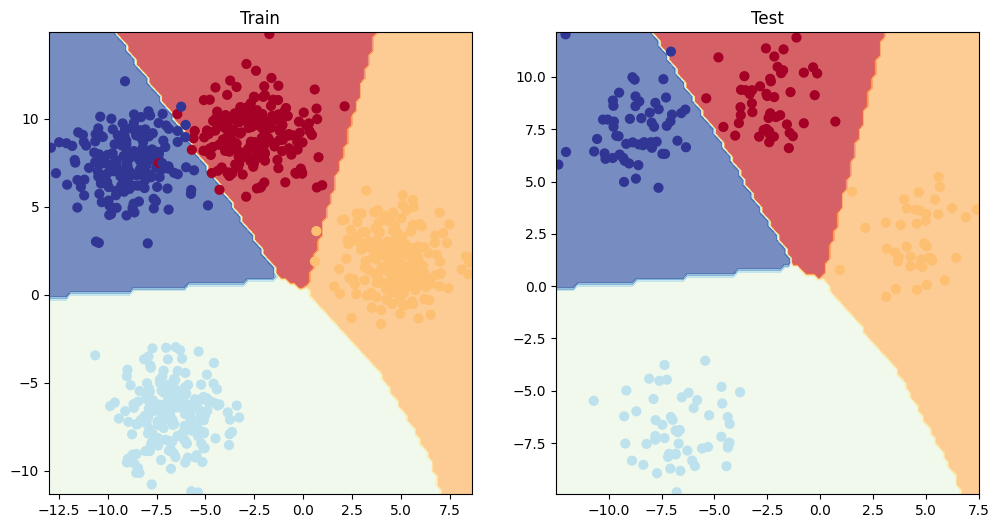

In [80]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4,X=X_blob_train,y=y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4,X=X_blob_test,y=y_blob_test)

#9. A few more classification metrics..( to evaluate our classifiction model)

* Accuracy - out of 100 samoles, how many does our model get right
* Precision
* Recall
* F1-Score
* Confusion Matrix
* Classification report

In [81]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 931.6/931.6 kB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 42.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 47.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 74.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [93]:
from torchmetrics import Accuracy

#setup metric
torchmetric_accuracy = Accuracy().to(device)

#calculate accuracy
torchmetric_accuracy()